In [1]:
import ipywidgets as widgets
import numpy as np
import soundfile as sf
from IPython.display import display
from ipywidgets import interactive
from matplotlib import pyplot as plt
from scipy import signal

from utils import rfft_plot, tf_plot

In [2]:
x, fs = sf.read('audio/beacon_deep4.flac')
x = x.T[:, :int(1*fs)]

In [3]:
# f_low, f_high = 40000, 44000
f_low = 20000
f_high = 80000
fig1, ax = plt.subplots(3, 1, figsize=(15, 10))
t = np.arange(0, x.shape[1]) / fs
ax[0].plot(t, x[0])
ax[0].set_xlim(t[0], t[-1])
f, t_seg, Zxx = signal.stft(x, fs, nperseg=8192, noverlap=int(8192/4*3))
freq_low, freq_high = 10000, 50000
ax[1].pcolormesh(t_seg, f[(freq_low<f)&(f<freq_high)], np.log10(np.abs(Zxx[0, (freq_low<f)&(f<freq_high)])), cmap='gnuplot')
line1, = ax[1].plot([0] * 2, [0] * 2, 'r')
# line2, = ax[2].plot([], [], 'yo')
# line3, = ax[2].plot([], [], 'go')
line2, = ax[2].plot([], [], 'y')
line3, = ax[2].plot([], [], 'g')
ax[2].set_xlim(f_low, f_high)
ax[2].set_ylim(-np.pi, np.pi)
plt.close()  # 关闭原生显示

def plot_phi(index):
    line1.set_data(np.array([t_seg[index]] * 2), np.array([f[0], f[-1]]))
    X = Zxx[:, :, index]
    # R12_23 = np.vstack((X[0], X[1]))
    R12_23 = np.vstack((X[0] * np.conj(X[1]), X[1] * np.conj(X[2])))
    phi = - np.angle(R12_23)
    line2.set_data(f[(f_low<f)&(f<f_high)], phi[0, (f_low<f)&(f<f_high)])
    line3.set_data(f[(f_low<f)&(f<f_high)], phi[1, (f_low<f)&(f<f_high)])
    display(fig1)

slider = widgets.IntSlider(min=0, max=Zxx.shape[2]-1, step=1, value=0, continuous_update=False, readout=False, layout=widgets.Layout(width='100%'))
interactive(plot_phi, index=slider)

interactive(children=(IntSlider(value=0, continuous_update=False, description='index', layout=Layout(width='10…

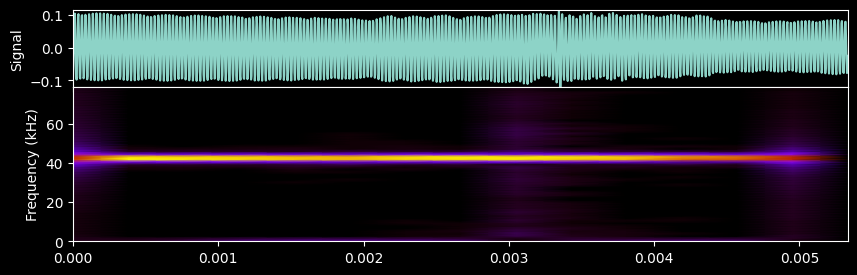

In [7]:
x0 = x[0, int(0.253*fs):int(0.258*fs)]
# x0 = x[0, int(1.279*fs):int(1.280*fs)]
# x0 = x[0, int(2.305*fs):int(2.308*fs)]
plt.close()
tf_plot(x0, fs)

单独分析脉冲内相位特征并不明显

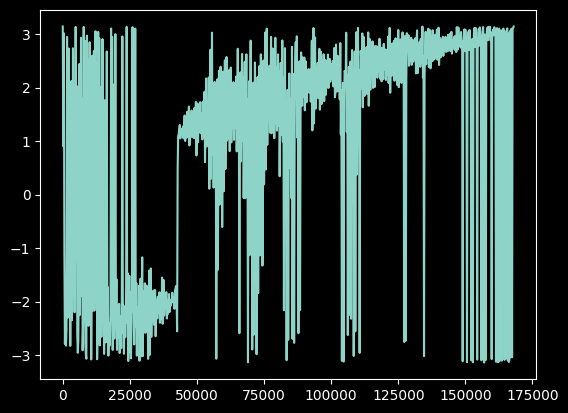

In [8]:
X0 = np.fft.rfft(x0)
f0 = np.fft.rfftfreq(x0.shape[-1], 1/fs)
plt.close()
plt.figure()
plt.plot(f0, np.angle(X0))
plt.show()